17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/5
782/782 [==============================] - 90s 113ms/step - loss: 0.4218 - accuracy: 0.7997 - val_loss: 0.3112 - val_accuracy: 0.8666
Epoch 2/5
782/782 [==============================] - 87s 111ms/step - loss: 0.2171 - accuracy: 0.9140 - val_loss: 0.3036 - val_accuracy: 0.8733
Epoch 3/5
782/782 [==============================] - 85s 108ms/step - loss: 0.0981 - accuracy: 0.9694 - val_loss: 0.3626 - val_accuracy: 0.8626
Epoch 4/5
782/782 [==============================] - 92s 118ms/step - loss: 0.0306 - accuracy: 0.9944 - val_loss: 0.4106 - val_accuracy: 0.8643
Epoch 5/5
782/782 [==============================] - 17s 22ms/step - loss: 0.4763 - accuracy: 0.8614
Test accuracy: 0.8614400029182434


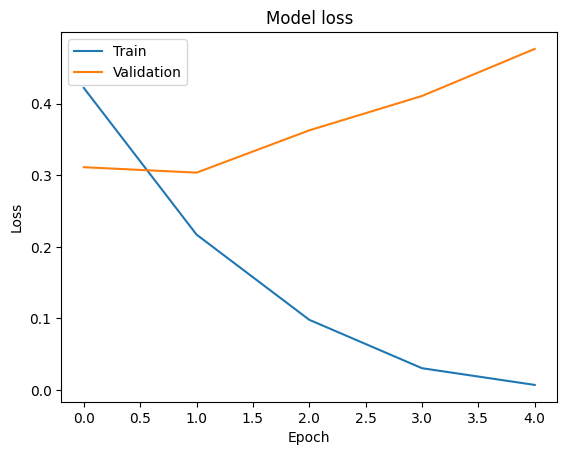

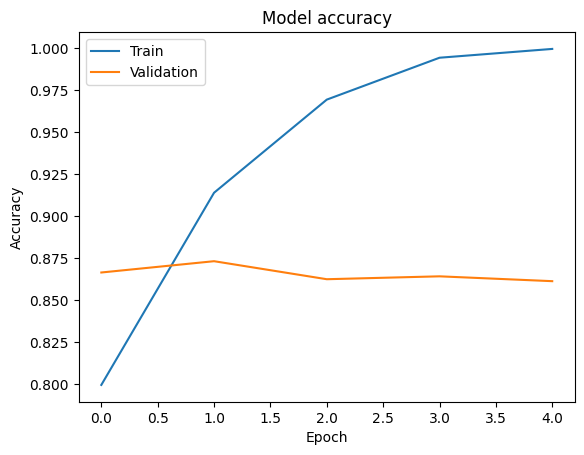

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import matplotlib.pyplot as plt

# Load the IMDb dataset
max_features = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = np.array([np.pad(x, (0, max_len - len(x)), 'constant') if len(x) < max_len else x[:max_len] for x in x_train])
x_test = np.array([np.pad(x, (0, max_len - len(x)), 'constant') if len(x) < max_len else x[:max_len] for x in x_test])

# Create the model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



782/782 [==============================] - 31s 39ms/step
Review #1 - Predicted Probability: 0.5207, Predicted Sentiment: Positive
Review #2 - Predicted Probability: 0.5260, Predicted Sentiment: Positive
Review #3 - Predicted Probability: 0.5218, Predicted Sentiment: Positive
Review #4 - Predicted Probability: 0.5235, Predicted Sentiment: Positive
Review #5 - Predicted Probability: 0.5238, Predicted Sentiment: Positive
Review #6 - Predicted Probability: 0.5259, Predicted Sentiment: Positive
Review #7 - Predicted Probability: 0.5210, Predicted Sentiment: Positive
Review #8 - Predicted Probability: 0.5162, Predicted Sentiment: Positive
Review #9 - Predicted Probability: 0.5202, Predicted Sentiment: Positive
Review #10 - Predicted Probability: 0.5227, Predicted Sentiment: Positive


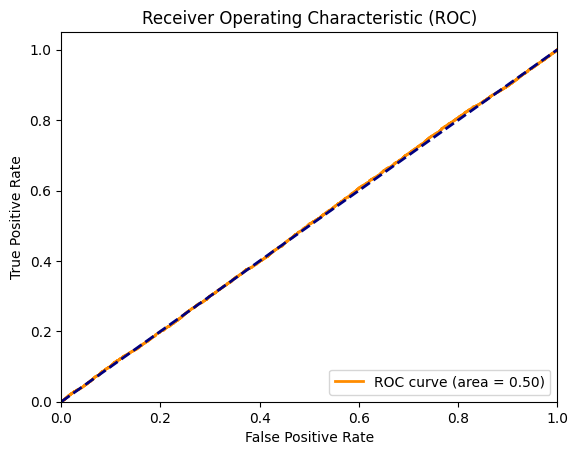

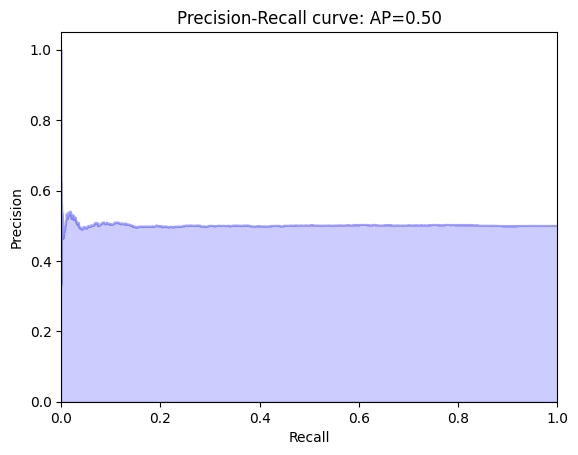

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the IMDb dataset
max_features = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = np.array([np.pad(x, (0, max_len - len(x)), 'constant') if len(x) < max_len else x[:max_len] for x in x_train])
x_test = np.array([np.pad(x, (0, max_len - len(x)), 'constant') if len(x) < max_len else x[:max_len] for x in x_test])

# Create the model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Preprocess x_test to have a fixed length
x_test = np.array([np.pad(x, (0, max_len - len(x)), 'constant') if len(x) < max_len else x[:max_len] for x in x_test])

y_pred_proba = model.predict(x_test)
y_pred_binary = (y_pred_proba > 0.5).astype(int)

# Print additional predictions
for i in range(10):
    print(f"Review #{i+1} - Predicted Probability: {y_pred_proba[i][0]:.4f}, Predicted Sentiment: {'Positive' if y_pred_binary[i][0] == 1 else 'Negative'}")

# Visualize ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
# Visualize precision-recall curve
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()



In [8]:
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data()

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

25000 train sequences
25000 test sequences


In [ ]:
from tensorflow.keras.datasets import imdb

# Load the IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data()
# Select a subset of movie reviews and their corresponding sentiments and ratings
sample_reviews = x_train[:10]  # Select first 10 reviews as an example
sample_sentiments = y_train[:10]  # Corresponding sentiments
# Display the sample movie reviews, sentiments, and ratings
for i, review in enumerate(sample_reviews):
    sentiment = "Positive" if sample_sentiments[i] == 1 else "Negative"
    print(f"Review {i+1}: Sentiment: {sentiment}, Rating: {sample_sentiments[i]}")
    print(" ".join([str(word) for word in review]))
    print()

"""Example
Review: "This movie was absolutely fantastic! The acting was superb, and the storyline kept me engaged from start to finish."
Sentiment: Positive
Rating: 1
Review Sequence: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, ...]

Review: "This movie was terrible. The acting was atrocious, and the plot was incredibly predictable. I wouldn't recommend it to anyone."
Sentiment: Negative
Rating: 0
Review Sequence: [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 14, 20, 56, ...]
"""

Review 1: Sentiment: Positive, Rating: 1
1 14 22 16 43 530 973 1622 1385 65 458 4468 66 3941 4 173 36 256 5 25 100 43 838 112 50 670 22665 9 35 480 284 5 150 4 172 112 167 21631 336 385 39 4 172 4536 1111 17 546 38 13 447 4 192 50 16 6 147 2025 19 14 22 4 1920 4613 469 4 22 71 87 12 16 43 530 38 76 15 13 1247 4 22 17 515 17 12 16 626 18 19193 5 62 386 12 8 316 8 106 5 4 2223 5244 16 480 66 3785 33 4 130 12 16 38 619 5 25 124 51 36 135 48 25 1415 33 6 22 12 215 28 77 52 5 14 407 16 82 10311 8 4 107 117 5952 15 256 4 31050 7 3766 5 723 36 71 43 530 476 26 400 317 46 7 4 12118 1029 13 104 88 4 381 15 297 98 32 2071 56 26 141 6 194 7486 18 4 226 22 21 134 476 26 480 5 144 30 5535 18 51 36 28 224 92 25 104 4 226 65 16 38 1334 88 12 16 283 5 16 4472 113 103 32 15 16 5345 19 178 32

Review 2: Sentiment: Negative, Rating: 0
1 194 1153 194 8255 78 228 5 6 1463 4369 5012 134 26 4 715 8 118 1634 14 394 20 13 119 954 189 102 5 207 110 3103 21 14 69 188 8 30 23 7 4 249 126 93 4 114 9 2300 1523 5 64

In [9]:
#Convert the integers back to words
INDEX_FROM = 3
word_index = imdb.get_word_index()
word_index = {key:(value+INDEX_FROM) for key,value in word_index.items()}
word_index["<PAD>"] = 0    # the padding token
word_index["<START>"] = 1  # the starting token
word_index["<UNK>"] = 2    # the unknown token
reverse_word_index = {value:key for key, value in word_index.items()}

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(X_train[0])


1641221/1641221 [==============================] - 0s 0us/step


"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

In [10]:
#Consider the top 5,000 most common word and also consider 20% of the training set for validation purpose.
vocab_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words= vocab_size)

X_train, X_val = X_train[:-5000], X_train[-5000:]
y_train, y_val = y_train[:-5000], y_train[-5000:]

print(len(X_train), 'train sequences')
print(len(X_val), 'val sequences')
print(len(X_test), 'test sequences')

20000 train sequences
5000 val sequences
25000 test sequences


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Create the model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

# Make predictions
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


782/782 [==============================] - 26s 33ms/step
Confusion Matrix:
[[5305 7195]
 [5394 7106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.42      0.46     12500
           1       0.50      0.57      0.53     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.49     25000
weighted avg       0.50      0.50      0.49     25000



In [11]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDb dataset
max_features = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to have the same length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Create the model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Save the model
model.save('imdb_sentiment_model.h5')


Epoch 1/5
782/782 [==============================] - 108s 136ms/step - loss: 0.4034 - accuracy: 0.8130 - val_loss: 0.2839 - val_accuracy: 0.8800
Epoch 2/5
782/782 [==============================] - 95s 122ms/step - loss: 0.1972 - accuracy: 0.9241 - val_loss: 0.2788 - val_accuracy: 0.8832
Epoch 3/5
782/782 [==============================] - 97s 124ms/step - loss: 0.0842 - accuracy: 0.9750 - val_loss: 0.3135 - val_accuracy: 0.8812
Epoch 4/5
782/782 [==============================] - 98s 126ms/step - loss: 0.0245 - accuracy: 0.9964 - val_loss: 0.3698 - val_accuracy: 0.8781
Epoch 5/5
782/782 [==============================] - 97s 124ms/step - loss: 0.0068 - accuracy: 0.9996 - val_loss: 0.4085 - val_accuracy: 0.8798


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDb dataset
max_features = 10000
max_len = 200
(_, _), (x_test, y_test) = imdb.load_data(num_words=max_features)

#Load the pre-trained model
model = load_model('imdb_sentiment_model.h5')

# Preprocess x_test to have a fixed length
x_test = pad_sequences(x_test, maxlen=max_len)
# Function to predict sentiment
def predict_sentiment(reviews):
    # Preprocess the input reviews
    reviews_seq = imdb.get_word_index()
    review_sequences = []
    for review in reviews:
        review_indices = [reviews_seq[word] if word in reviews_seq and reviews_seq[word] < max_features else 2 for word in review.split()]
        review_sequences.append(review_indices)

    review_sequences = pad_sequences(review_sequences, maxlen=max_len)

    # Predict sentiments
    predictions = model.predict(review_sequences)

    # Interpret predictions
    sentiments = ["Negative" if pred >= 0.5 else "Positive" for pred in predictions]
    return sentiments

# Example usage
sample_reviews = [
    "The movie was fantastic! I loved every moment of it.",
    "The acting was terrible and the plot was boring.",
    "It was an okay movie, nothing special."
]

predicted_sentiments = predict_sentiment(sample_reviews)
for review, sentiment in zip(sample_reviews, predicted_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")


1/1 [==============================] - 0s 81ms/step
Review: The movie was fantastic! I loved every moment of it.
Predicted Sentiment: Positive

Review: The acting was terrible and the plot was boring.
Predicted Sentiment: Negative

Review: It was an okay movie, nothing special.
Predicted Sentiment: Positive

